In [1]:
import pandas as pd

df=pd.read_csv("C:/Users/User/Documents/Python Scripts/winequality-red.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [17]:
from sklearn import preprocessing

#preprocessing.StandardScaler().fit computes the mean and std keeps it for later scaling
std_scale = preprocessing.StandardScaler().fit(df[['fixed acidity','citric acid']])
#perform standarization by centering and scaling
df_std = std_scale.transform(df[['fixed acidity','citric acid']])

df_std

array([[-0.52835961, -1.39147228],
       [-0.29854743, -1.39147228],
       [-0.29854743, -1.18607043],
       ...,
       [-1.1603431 , -0.72391627],
       [-1.39015528, -0.77526673],
       [-1.33270223,  1.02199944]])

In [18]:
#verifying standardization of any 2 columns to check if mean=0 and std =1 
print('Mean after standardization:\nfixed acidity={:.2f}, citric acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

Mean after standardization:
fixed acidity=0.00, citric acid=-0.00


In [20]:
print('\nStandard deviation after standardization:\nfixed acidity={:.3f}, citric acid={:.3f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Standard deviation after standardization:
fixed acidity=1.000, citric acid=1.000


In [23]:
#preprocessing.MinMax().fit computes MaxValue on train data
std_minmax = preprocessing.MinMaxScaler().fit(df[['fixed acidity','citric acid']])
#perform MinMax on test data
df_minmax = std_minmax.transform(df[['fixed acidity','citric acid']])


In [25]:
print('Min-value after min-max scaling:\nfixed acidity={:.2f}, citric acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nfixed acidity={:.2f}, citric acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
fixed acidity=0.00, citric acid=0.00

Max-value after min-max scaling:
fixed acidity=1.00, citric acid=1.00


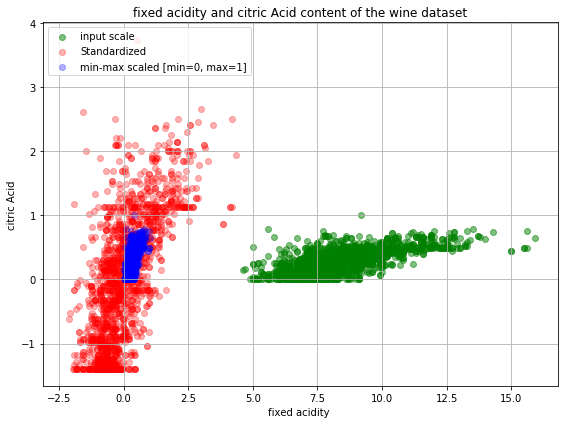

In [31]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['fixed acidity'], df['citric acid'],
            color='green', label='input scale', alpha=0.5)
    
    plt.scatter(df_std[:,0], df_std[:,1], color='red',label='Standardized', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('fixed acidity and citric Acid content of the wine dataset')
    plt.xlabel('fixed acidity ')
    plt.ylabel('citric Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [34]:
from sklearn.cross_validation import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]


array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=12345)


In [39]:
y_test


array([ 8. ,  6.6,  9.6,  9.5,  5.6,  7.5,  7.3,  7.3,  7.8,  8.8,  8.2,
        7.2, 13.8,  8.1,  6.9,  6.6,  7.4,  7.5,  6.3,  9.1,  8. , 11.9,
        9. ,  6.6,  6.3,  5.6,  7.3,  9.9,  8.6,  8.8,  8.1,  7.4,  7.2,
       13.4,  9.3,  7.5,  8.8,  9.2, 13.2,  7.7,  7.6,  6.1,  9.4,  5.6,
        7.8,  6.6,  7. ,  7.9,  6.8,  6.5,  7.1,  9.8,  8.8,  7.9,  9.8,
        6.8,  6.7,  7.7,  8.2,  7.2,  8.3,  8.3,  9.6, 13.2,  6.4,  7.7,
        9.1, 10. ,  8.4, 11.4,  7.7,  7.9,  8.2,  6.7,  7.5,  5.9,  6. ,
       11.2,  6.7, 11.9,  9.7,  7.7,  7.6,  8.2,  8.2,  8. , 10.2,  8.6,
        8.2,  8. ,  7.5,  7.8,  7.2,  9. , 10.1,  7.2, 11.4,  6.6,  6. ,
        6.3,  8.4,  7.2,  9.5, 12. ,  7.4, 12.5,  6.7, 12.4,  7.2,  6.8,
        8.2,  9.4,  6. ,  7.8,  8.8,  6.9, 11.6, 11.3,  9.9,  7.6,  8.9,
        7.2,  7.9, 10.5, 10. , 12.6,  7.6,  7.1,  9. ,  7.4,  9.7,  8.1,
       12.4,  7.6,  6.7,  7.3,  7.6,  7. ,  8.2, 10. ,  6. ,  8.9, 10.7,
        7.3,  7.4,  6.6, 11.5,  7.6,  9.1, 10.8,  7